In [1]:
import datetime, time
import pytz
import json
import matplotlib.pyplot as plt
import io
from collections import defaultdict
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold

/Users/luren/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Resort every hashtag file by 'citation_date'

### Reconstruct "gohawks"

In [4]:
gohawks = []
f = open('/Users/luren/tweets_#gohawks.txt', 'rb')
for line in f:
    gohawks.append(json.loads(line))

In [5]:
gohawks_out = sorted(gohawks, key = lambda x: x['citation_date'])

In [6]:
fileObject = open('/Users/luren/gohawks.json', 'w+')
for tweet in gohawks_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

### Reconstruct "gopatriots"

In [7]:
gopatriots = []
f = open('/Users/luren/tweets_#gopatriots.txt', 'rb')
for line in f:
    gopatriots.append(json.loads(line))

In [8]:
gopatriots_out = sorted(gopatriots, key = lambda x: x['citation_date'])

In [9]:
fileObject = open('/Users/luren/gopatriots.json', 'w+')
for tweet in gopatriots_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

### Reconstruct "nfl"

In [10]:
nfl = []
f = open('/Users/luren/tweets_#nfl.txt', 'rb')
for line in f:
    nfl.append(json.loads(line))

In [11]:
nfl_out = sorted(nfl, key = lambda x: x['citation_date'])

In [12]:
fileObject = open('/Users/luren/nfl.json', 'w+')
for tweet in nfl_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

### Reconstruct "patriots"

In [13]:
patriots = []
f = open('/Users/luren/tweets_#patriots.txt', 'rb')
for line in f:
    patriots.append(json.loads(line))

In [14]:
patriots_out = sorted(patriots, key = lambda x: x['citation_date'])

In [15]:
fileObject = open('/Users/luren/patriots.json', 'w+')
for tweet in patriots_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

### Reconstruct "sb49"

In [16]:
sb49 = []
f = open('/Users/luren/tweets_#sb49.txt', 'rb')
for line in f:
    sb49.append(json.loads(line))

In [17]:
sb49_out = sorted(sb49, key = lambda x: x['citation_date'])

In [18]:
fileObject = open('/Users/luren/sb49.json', 'w+')
for tweet in sb49_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

### Reconstruct "superbowl"

In [2]:
superbowl = []
f = open('/Users/luren/tweets_#superbowl.txt', 'rb')
for line in f:
    superbowl.append(json.loads(line))

In [3]:
superbowl_out = sorted(superbowl, key = lambda x: x['citation_date'])

In [4]:
fileObject = open('/Users/luren/superbowl.json', 'w+')
for tweet in superbowl_out:
    jsObj = json.dumps(tweet)
    fileObject.write(jsObj+'\n')
fileObject.close()

# Problem 1.1

## Calculate statistics

In [3]:
tag = ['/Users/luren/gohawks.json', '/Users/luren/gopatriots.json', '/Users/luren/nfl.json', 
       '/Users/luren/patriots.json', '/Users/luren/sb49.json', '/Users/luren/superbowl.json']

In [4]:
for tagname in tag:
    retweets = 0
    followers = 0
    print(tagname)
    f = io.open(tagname, 'rb')

    number_tweets = len(f.readlines())
    f.seek(0, 0)
    tweet_0 = json.loads(f.readline()) 
    print('number_of_tweet is %.1f' % number_tweets)
    #user_ids = dict()
    #number_tweets = len(tag)
    f.seek(0, 0) #Go back to the original point
    
    start_time = tweet_0['citation_date']
    #end_time = tweet_0['citation_date']
    #user_ids[tweet_0['tweet']['user']['id']] = tweet_0['author']['followers']
    
    for line in f:
        tweet = json.loads(line)
        end_time = tweet['citation_date']
    
        followers = followers + tweet['author']['followers']
        retweets = retweets + tweet['metrics']['citations']['total']
        #user_id = tweet['tweet']['user']['id']
        #number_of_followers = tweet['author']['followers']
        #user_ids[user_id] = number_of_followers
    
    #print(start_time)
    #print(end_time)
    
    print('start_time', start_time)
    print('end_time', end_time)
    
    number_hour = (end_time - start_time)/3600.
    print('number of hours is %.4f' % number_hour)
    avg_num = float(float(number_tweets)/float(number_hour))
    print('Average number of tweets per hour is %.4f' % avg_num)
    
    #print(len(user_ids.keys()))
    #print(sum(user_ids.values()))
    #avg_fol = float(sum(user_ids.values())/float(len(user_ids.keys())))
    avg_fol = float(float(followers)/float(number_tweets))
    print('Average number of followers is %.4f' % avg_fol)
    
    avg_ret = float(float(retweets)/float(number_tweets))
    print('Average number of retweets is %.4f' % avg_ret) 

/Users/luren/gohawks.json
number_of_tweet is 188136.0
start_time 1421222681
end_time 1423304269
number of hours is 578.2189
Average number of tweets per hour is 325.3716
Average number of followers is 2203.9318
Average number of retweets is 2.0146
/Users/luren/gopatriots.json
number_of_tweet is 26232.0
start_time 1421229011
end_time 1423295675
number of hours is 574.0733
Average number of tweets per hour is 45.6945
Average number of followers is 1401.8955
Average number of retweets is 1.4001
/Users/luren/nfl.json
number_of_tweet is 259024.0
start_time 1421222404
end_time 1423335336
number of hours is 586.9256
Average number of tweets per hour is 441.3234
Average number of followers is 4653.2523
Average number of retweets is 1.5385
/Users/luren/patriots.json
number_of_tweet is 489713.0
start_time 1421222838
end_time 1423335300
number of hours is 586.7950
Average number of tweets per hour is 834.5555
Average number of followers is 3309.9788
Average number of retweets is 1.7828
/Users/lur

## Plot histogram

In [5]:
import math

In [76]:
#nfl
f = io.open('/Users/luren/nfl.json', 'rb')
    
current_window = 1
tweet_0 = json.loads(f.readline()) 
start_time = tweet_0['citation_date']
#Each window is one-hour
end_time_of_window = start_time + current_window * 3600 

number_of_tweets_per_hour = np.zeros(587)
current_hour_tweet = 0
f.seek(0, 0)

for line in f:
    tweet = json.loads(line)
    end_time = tweet['citation_date']
   
    if end_time < end_time_of_window:
        current_hour_tweet += 1
    else:
        # calculate current window this tweet belongs to
        n = math.ceil((end_time - start_time)/3600)
        #number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
        current_window = n
        #number_of_tweets_per_hour.append(current_hour_tweet)
        #current_window += 1
        current_hour_tweet = 1
        end_time_of_window = start_time + current_window * 3600
    number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
    
print(len(number_of_tweets_per_hour))
print(sum(number_of_tweets_per_hour))
print(max(number_of_tweets_per_hour))

587
161440.0
10830.0


In [6]:
#nfl
f = io.open('/Users/luren/nfl.json', 'rb')
    
#current_window = 1
tweet_0 = json.loads(f.readline()) 
start_time = tweet_0['citation_date']
#Each window is one-hour
#end_time_of_window = start_time + current_window * 3600 

number_of_tweets_per_hour = np.zeros(587)
#current_hour_tweet = 0
f.seek(0, 0)

for line in f:
    tweet = json.loads(line)
    #end_time = tweet['citation_date']
    time = tweet['citation_date']
    n = math.ceil((time - start_time)/3600.)
    number_of_tweets_per_hour[(n-1)] += 1
   
    #if end_time < end_time_of_window:
        #current_hour_tweet += 1
    #else:
        # calculate current window this tweet belongs to
        #n = math.ceil((end_time - start_time)/3600)
        #number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
        #current_window = n
        #number_of_tweets_per_hour.append(current_hour_tweet)
        #current_window += 1
        #current_hour_tweet = 1
        #end_time_of_window = start_time + current_window * 3600
    #number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
    
print(len(number_of_tweets_per_hour))
print(sum(number_of_tweets_per_hour))
print(max(number_of_tweets_per_hour))

587
259024.0
10830.0


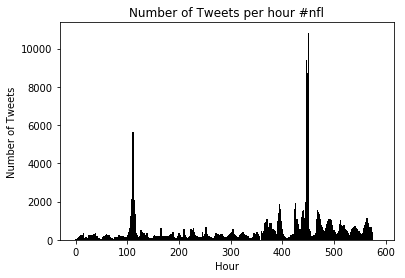

In [7]:
plt.bar(range(len(number_of_tweets_per_hour)), number_of_tweets_per_hour, width = 3, color = 'black')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per hour #nfl')
plt.show()

In [10]:
#superbowl
f = io.open('/Users/luren/superbowl.json', 'rb')
    
#current_window = 1
tweet_0 = json.loads(f.readline()) 
start_time = tweet_0['citation_date']
#Each window is one-hour
#end_time_of_window = start_time + current_window * 3600 

number_of_tweets_per_hour = np.zeros(586)
#current_hour_tweet = 0
f.seek(0, 0)

for line in f:
    tweet = json.loads(line)
    #end_time = tweet['citation_date']
    time = tweet['citation_date']
    n = math.ceil((time - start_time)/3600.)
    number_of_tweets_per_hour[(n-1)] += 1
   
    #if end_time < end_time_of_window:
        #current_hour_tweet += 1
    #else:
        # calculate current window this tweet belongs to
        #n = math.ceil((end_time - start_time)/3600)
        #number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
        #current_window = n
        #number_of_tweets_per_hour.append(current_hour_tweet)
        #current_window += 1
        #current_hour_tweet = 1
        #end_time_of_window = start_time + current_window * 3600
    #number_of_tweets_per_hour[(current_window-1)] = current_hour_tweet
    
print(len(number_of_tweets_per_hour))
print(sum(number_of_tweets_per_hour))
print(max(number_of_tweets_per_hour))

586
1348767.0
243228.0


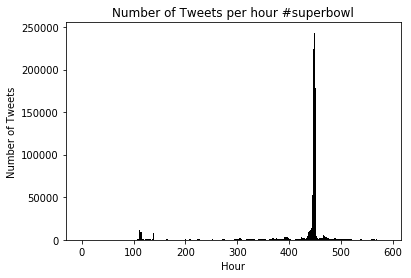

In [11]:
plt.bar(range(len(number_of_tweets_per_hour)), number_of_tweets_per_hour, width = 3, color = 'black')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per hour #superbowl')
plt.show()

# Problem 1.2

In [12]:
hour_list = [579, 575, 587, 587, 583, 586]

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [25]:
# features are number of tweets, number of retweets, number of followers, maximum number of followers, time of the day
i = 0
for tagname in tag:
    print(tagname)
    f = io.open(tagname, 'r')
    
    tweet_0 = json.loads(f.readline())  
    start_time = tweet_0['citation_date']
    #current_window = 1
    #end_time_of_window = start_time + current_window * 3600
   
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')
    #current_hour_tweet = 0
    #current_hour_retweets = 0
    #current_hour_followers = 0
    #current_hour_max_followers = 0

    tweet_features = np.zeros([hour_list[i], 5])
    #tweet_class = np.zeros(hour_list[i])
    f.seek(0, 0)
    
    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        # Calculate which hour current tweet belongs to
        n = math.ceil((time - start_time)/3600.)
        # Update value of features for corresponding hour 
        tweet_features[(n-1), 0] += 1
        tweet_features[(n-1), 1] += tweet['metrics']['citations']['total']
        followers = tweet['author']['followers']
        tweet_features[(n-1), 2] += followers
        if followers > tweet_features[(n-1), 3]:
            tweet_features[(n-1), 3] = followers
        time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
        tweet_features[(n-1), 4] = time_of_the_day
        
    tweet_y = tweet_features[1:,0]
    tweet_x = tweet_features[:(hour_list[i]-1), 1:]
    
        #if end_time <= end_time_of_window:
            #current_hour_tweet += 1
            #current_hour_retweets += tweet['metrics']['citations']['total']
            #followers = tweet['author']['followers']
            #current_hour_followers += followers
            #if followers > current_hour_max_followers:
                #current_hour_max_followers = followers
            #time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
        #else:
            # store the independent and dependent variables for the last time window
            #tweet_class[(current_window-1)] = current_hour_tweet
            #features = [current_hour_tweet,current_hour_retweets,current_hour_followers,current_hour_max_followers,time_of_the_day]
            #tweet_features[(current_window-1)] = features
            
            # Go to the time window current tweet belongs to 
            #n = math.ceil((end_time - start_time)/3600)
            #current_window = n
            #end_time_of_window = start_time + current_window * 3600
            
            # reset features
            #current_hour_tweet = 1
            #current_hour_retweets = tweet['metrics']['citations']['total']
            #current_hour_followers = tweet['author']['followers']
            #current_hour_max_followers = tweet['author']['followers']
    
    print(sum(tweet_features[:, 0]))
    # Reconstruct independent and dependent variable
    #tweet_class_model = tweet_class[1:]
    #tweet_features_model = tweet_features[0:(len(tweet_features)-1)]
    #del(tweet_class[0])
    #del(tweet_features[-1])

    # Build linear regression model
    result = sm.OLS(tweet_y, tweet_x).fit()
    # Calculate RMSE
    tweet_y_predict = result.predict(tweet_x)
    rmse = sqrt(mean_squared_error(tweet_y, tweet_y_predict))
    
    print('Parameters : ', result.params)
    print('R-squares measure : ', result.rsquared)
    print('RMSE : ', rmse)
    print('p values : ', result.pvalues)
    print('t-test : ', result.tvalues)
    
    i = i + 1

/Users/luren/gohawks.json
188136.0
Parameters :  [ -9.30764744e-03   3.85654700e-04  -6.57483458e-04   1.24741406e+01]
R-squares measure :  0.461795198691
RMSE :  1006.3390828098585
p values :  [  8.02297712e-01   4.04906612e-22   3.48453742e-06   3.15202615e-04]
t-test :  [ -0.25049046  10.0820695   -4.68589648   3.62452617]
/Users/luren/gopatriots.json
26232.0
Parameters :  [  3.28261336e-01   3.68812140e-04  -4.67890141e-04   9.30112960e-01]
R-squares measure :  0.605967616777
RMSE :  195.65006145415165
p values :  [ 0.03476319  0.0520287   0.01098856  0.1948119 ]
t-test :  [ 2.11617046  1.94697345 -2.55141694  1.29800121]
/Users/luren/nfl.json
259024.0
Parameters :  [  6.62658372e-02   1.59492883e-04  -1.67582019e-04   1.15313796e+01]
R-squares measure :  0.62883447265
RMSE :  600.2791146100624
p values :  [  1.93165905e-01   6.36378098e-13   2.91731799e-07   1.62046863e-07]
t-test :  [ 1.30277767  7.35855625 -5.18948027  5.30299463]
/Users/luren/patriots.json
489713.0
Parameters :

# Problem 1.3

In [26]:
# Add new features: Ranking score, favorite count, impression_count, number of users tweeting per hour
feature_names = ['current_hour_retweets', 'current_hour_followers',
                       'max_number_of_followers', 'time_of_the_day', 'ranking_score', 'favourite_count',
                       'impression_count', 'number_user_tweeting']

/Users/luren/gohawks.json
188136.0
(578,)
(578, 8)
R-squares measure :  0.541218691949
RMSE :  902.5959282427425
p values :  [  4.86083194e-17   3.43155185e-07   3.97424364e-02   4.80913495e-01
   1.85485426e-28   9.31022302e-14   1.76679515e-05   2.62824681e-01]
t-test :  [ -8.65983082  -5.15903336   2.06114265   0.70529707  11.69223101
   7.63893933   4.3293392    1.12084774]
[4, 0, 5, 1, 6, 2, 7, 3]


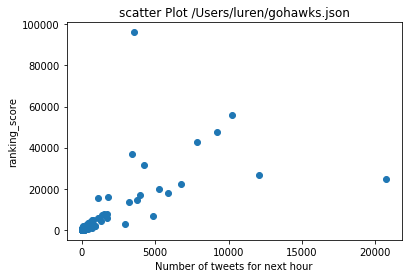

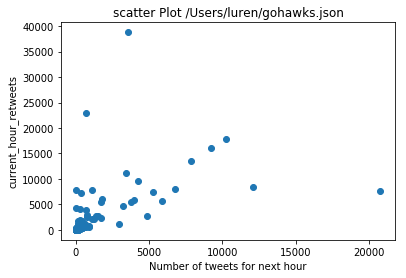

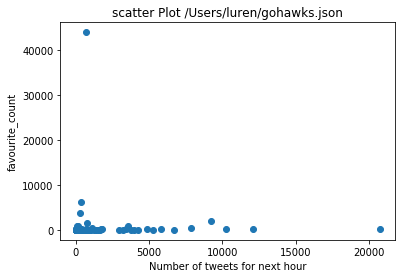

/Users/luren/gopatriots.json
26232.0
(574,)
(574, 8)
R-squares measure :  0.706101992477
RMSE :  167.14501658830417
p values :  [  6.39986531e-03   1.11827772e-06   1.57440332e-03   2.22888602e-01
   5.63225355e-01   7.18323810e-38   3.17094895e-07   5.92885942e-01]
t-test :  [  2.73675096   4.92325792  -3.17601762   1.22022273  -0.57839823
 -13.87093663  -5.17493436   0.53496242]
[5, 6, 1, 2, 0, 3, 4, 7]


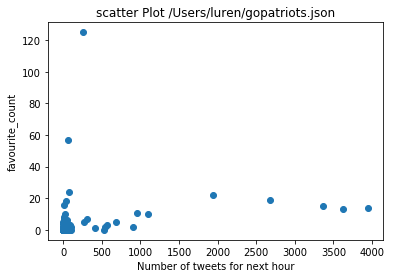

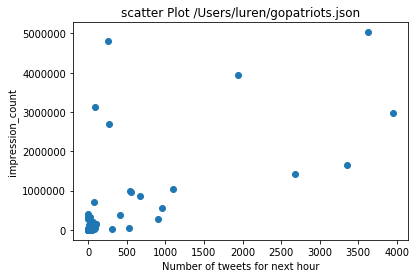

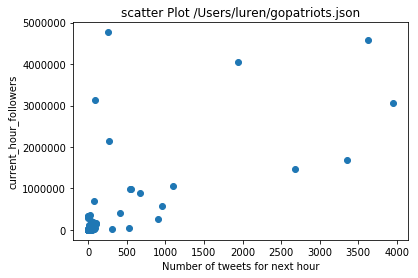

/Users/luren/nfl.json
259024.0
(586,)
(586, 8)
R-squares measure :  0.688286751017
RMSE :  491.67179108094444
p values :  [  3.93380946e-02   6.90655932e-01   6.55252718e-01   7.25274160e-01
   1.17335625e-20   1.24058507e-44   7.34035733e-01   1.23126298e-01]
t-test :  [ -2.06531889   0.39816453   0.4467087   -0.35158965   9.68481152
 -15.30357616  -0.33992602   1.54403854]
[5, 4, 0, 7, 2, 1, 3, 6]


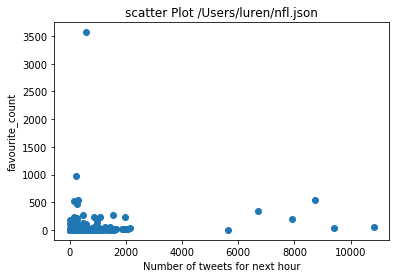

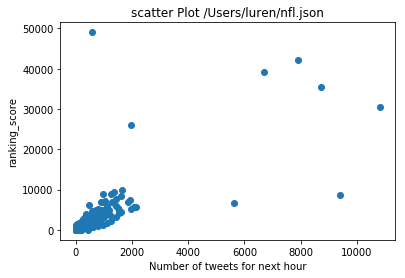

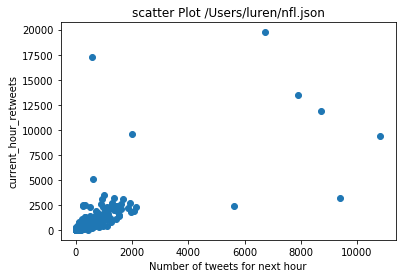

/Users/luren/patriots.json
489713.0
(586,)
(586, 8)
R-squares measure :  0.701234299336
RMSE :  2391.801502456121
p values :  [  1.49431138e-04   5.90188383e-01   2.98671302e-02   9.50630300e-01
   6.97297879e-28   6.02529853e-01   5.58271696e-01   4.23124001e-01]
t-test :  [ -3.81738775   0.5388637    2.17723123  -0.06194217  11.5435339
   0.52105237  -0.5857507    0.80158234]
[4, 0, 2, 7, 6, 1, 5, 3]


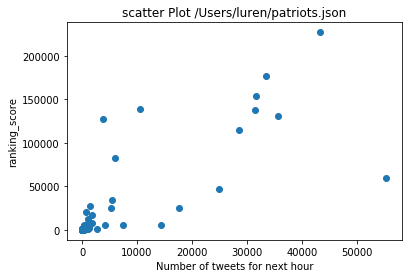

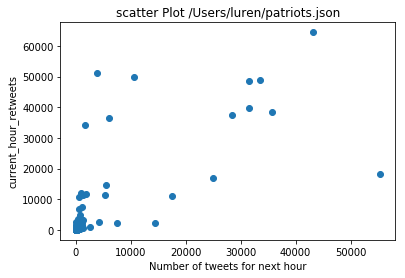

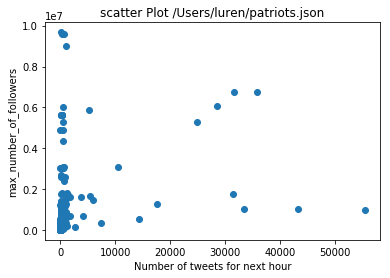

/Users/luren/sb49.json
826951.0
(582,)
(582, 8)
R-squares measure :  0.838488352702
RMSE :  4035.4478106167744
p values :  [  7.14147065e-02   1.38888156e-01   7.21476180e-08   4.01413076e-01
   1.52691536e-24   1.83368933e-02   1.54824340e-01   8.31772869e-01]
t-test :  [ -1.80617478   1.48200339   5.45692714  -0.83972344  10.71418118
  -2.36550563  -1.42457221   0.21252507]
[4, 2, 5, 0, 1, 6, 3, 7]


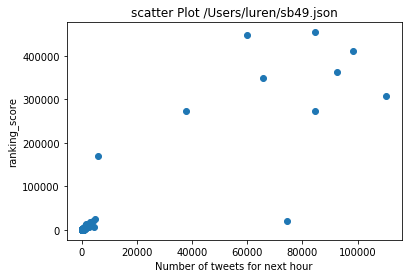

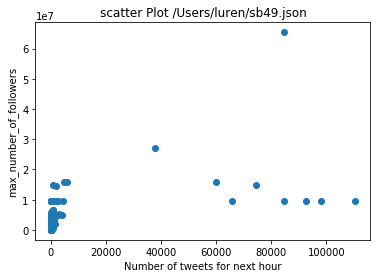

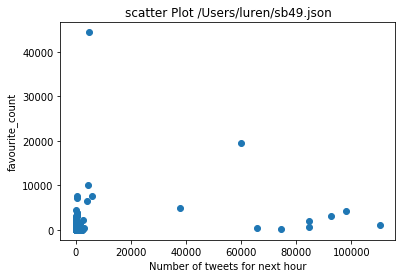

/Users/luren/superbowl.json
1348767.0
(585,)
(585, 8)
R-squares measure :  0.872933772074
RMSE :  6371.899503865502
p values :  [  9.17059056e-02   3.20920681e-01   5.10414718e-25   7.37432447e-01
   5.80154806e-53   1.64011069e-06   6.35499891e-02   1.75270652e-01]
t-test :  [ -1.68928055   0.99342216  10.83269811  -0.33541702  17.02425596
  -4.8436094   -1.85890166  -1.35712962]
[4, 2, 5, 6, 0, 7, 1, 3]


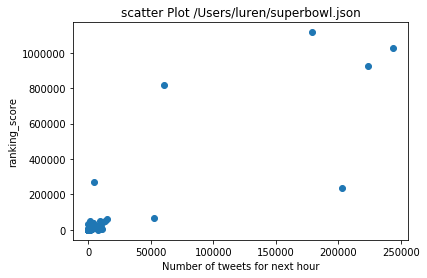

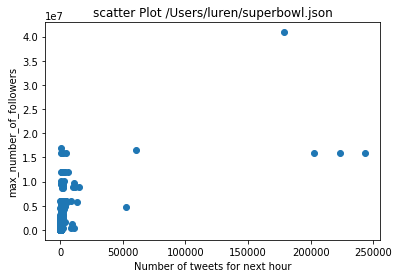

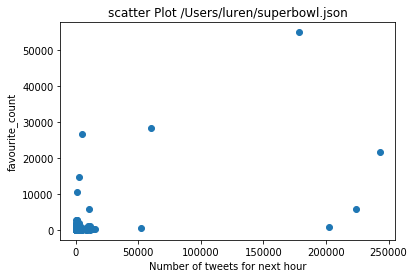

In [48]:
m = 0
for tagname in tag:
    print(tagname)
    f = io.open(tagname, 'r')
    
    tweet_0 = json.loads(f.readline())  
    start_time = tweet_0['citation_date']
    
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')
    tweet_features_more = np.zeros([hour_list[m], 9])
    user_id = [[]] * hour_list[m]
    #for k in range(hour_list[i]):
        #tweet_features_more[k, 8] = []
    f.seek(0, 0)
        
    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        # Calculate which hour current tweet belongs to
        n = math.ceil((time - start_time)/3600.)
        # Update value of features for corresponding hour 
        tweet_features_more[(n-1), 0] += 1
        tweet_features_more[(n-1), 1] += tweet['metrics']['citations']['total']
        followers = tweet['author']['followers']
        tweet_features_more[(n-1), 2] += followers
        if followers > tweet_features_more[(n-1), 3]:
            tweet_features_more[(n-1), 3] = followers
        time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
        tweet_features_more[(n-1), 4] = time_of_the_day
        tweet_features_more[(n-1), 5] += tweet['metrics']['ranking_score']
        tweet_features_more[(n-1), 6] += tweet['tweet']['favorite_count']
        tweet_features_more[(n-1), 7] += tweet['metrics']['impressions']
        user_id[(n-1)].append(tweet['tweet']['user']['id'])
        
    
    for t in range(len(user_id)):
        tweet_features_more[t, 8] = len(np.unique(user_id[t]))
    print(sum(tweet_features_more[:, 0]))
    
    # Reconstruct independent and dependent variable
    tweet_more_y = tweet_features_more[1:,0]
    print(tweet_more_y.shape)
    tweet_more_x = tweet_features_more[:(hour_list[m]-1), 1:]
    print(tweet_more_x.shape)
    
    # Build model
    result = sm.OLS(tweet_more_y, tweet_more_x).fit()
    tweet_more_y_predict = result.predict(tweet_more_x)
    rmse = sqrt(mean_squared_error(tweet_more_y, tweet_more_y_predict))
    sorted_p_values = sorted(range(len(result.pvalues)), key=lambda x: result.pvalues[x])
    sorted_t_values = sorted(range(len(result.tvalues)), key=lambda x: result.tvalues[x])[::-1]

    #print('Parameters : ', result.params)
    print('R-squares measure : ', result.rsquared)
    print('RMSE : ', rmse)
    print('p values : ', result.pvalues)
    print('t-test : ', result.tvalues)
    print(sorted_p_values)
    
    for i in range(1,4):
        plt.title("scatter Plot {}".format(tagname))
        plt.xlabel("Number of tweets for next hour")
        plt.ylabel(feature_names[sorted_p_values[i-1]])
        plt.scatter(np.array(tweet_more_y), np.array(tweet_more_x)[:, sorted_p_values[i-1]])
        plt.show()
    
    m = m + 1

# Problem 1.4 Q1

In [38]:
# calculate number of hours for each time series
start_time_tag = [1421222681, 1421229011, 1421222404, 1421222838, 1421238675, 1421223187]
end_time_tag = [1423304269, 1423295675, 1423335336, 1423335300, 1423335336, 1423332008]

In [50]:
time_8am = 1422806400
time_8pm = 1422849600
hour_before = np.zeros(6, int)
hour_between = np.zeros(6, int)
hour_after = np.zeros(6, int)
for i in range(6):
    hour_before[i] = math.ceil((time_8am - start_time_tag[i])/3600.)
    hour_between[i] = math.ceil((time_8pm - time_8am)/3600.)
    hour_after[i] = math.ceil((end_time_tag[i] - time_8am)/3600.)

In [44]:
hour_before

array([ 440.,  439.,  440.,  440.,  436.,  440.])

In [45]:
hour_between

array([ 12.,  12.,  12.,  12.,  12.,  12.])

In [46]:
hour_after

array([ 139.,  136.,  147.,  147.,  147.,  147.])

### Linear model

In [63]:
# Linear regression model
m = 0
for tagname in tag:
    print(tagname)
    f = io.open(tagname, 'r')
    
    tweet_0 = json.loads(f.readline())  
    start_time = tweet_0['citation_date']
    print(start_time)
    
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')
    tweet_features_before = np.zeros([hour_before[m], 9])
    user_id_before = [[]] * hour_before[m]
    tweet_features_between = np.zeros([hour_between[m], 9]) 
    user_id_between = [[]] * hour_between[m]
    tweet_features_after = np.zeros([hour_after[m], 9])
    user_id_after = [[]] * hour_after[m]

    f.seek(0, 0)
    
    flag_2 = True
    flag_3 = True
    
    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        
        # For the first time period
        if time < 1422806400:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - start_time_tag[m])/3600.)
            # Update value of features for corresponding hour 
            tweet_features_before[(n-1), 0] += 1
            tweet_features_before[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_before[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_before[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_before[(n-1), 4] = time_of_the_day
            tweet_features_before[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_before[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_before[(n-1), 7] += tweet['metrics']['impressions']
            user_id_before[(n-1)].append(tweet['tweet']['user']['id'])
            
        elif (time >= 1422806400) and (time < 1422849601):
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8am)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_between[(n-1), 0] += 1
            tweet_features_between[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_between[(n-1), 2] += followers
            if followers > tweet_features_between[(n-1), 3]:
                tweet_features_between[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_between[(n-1), 4] = time_of_the_day
            tweet_features_between[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_between[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_between[(n-1), 7] += tweet['metrics']['impressions']
            user_id_between[(n-1)].append(tweet['tweet']['user']['id'])
            
        else:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8pm)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_after[(n-1), 0] += 1
            tweet_features_after[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_after[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_after[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_after[(n-1), 4] = time_of_the_day
            tweet_features_after[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_after[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_after[(n-1), 7] += tweet['metrics']['impressions']
            user_id_after[(n-1)].append(tweet['tweet']['user']['id'])
    
    for t in range(len(user_id_before)):
        tweet_features_before[t, 8] = len(np.unique(user_id_before[t]))
    for l in range(len(user_id_between)):
        tweet_features_between[l, 8] = len(np.unique(user_id_between[l]))
    for n in range(len(user_id_after)):
        tweet_features_after[n, 8] = len(np.unique(user_id_after[n]))
    print(sum(tweet_features_before[:, 0]))
    print(sum(tweet_features_between[:, 0]))
    #print(tweet_features_between)
    print(sum(tweet_features_after[:, 0]))
    
    # Reconstruct independent and dependent variable
    tweet_before_y = tweet_features_before[1:,0]
    #print(tweet_before_y.shape)
    tweet_before_x = tweet_features_before[:(hour_before[m]-1), 1:]
    #print(tweet_before_x.shape)
    
    tweet_between_y = tweet_features_between[1:,0]
    #print(tweet_between_y.shape)
    tweet_between_x = tweet_features_between[:(hour_between[m]-1), 1:]
    #print(tweet_between_x.shape)
    
    tweet_after_y = tweet_features_after[1:,0]
    #print(tweet_after_y.shape)
    tweet_after_x = tweet_features_after[:(hour_after[m]-1), 1:]
    #print(tweet_after_x.shape)
    
    # Build model
    #result_before = sm.OLS(tweet_before_y, tweet_before_x).fit()
    #result_between = sm.OLS(tweet_between_y, tweet_between_x).fit()
    #result_after = sm.OLS(tweet_after_y, tweet_after_x).fit()
                
    time_series = ['Before Feb. 1, 8:00 a.m.', 'Between Feb. 1, 8:00 a.m. and 8:00 p.m.', 'After Feb. 1, 8:00 p.m.']
    tweet_y_all = [tweet_before_y, tweet_between_y, tweet_after_y]
    tweet_x_all = [tweet_before_x, tweet_between_x, tweet_after_x]
    
    for i in range(3):
        print(time_series[i])
        # 10-folder cross-validation
        X = np.array(tweet_x_all[i])
        Y = np.array(tweet_y_all[i])
    
        average_error = []
        r_squared = []
        rmse = []
    
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
        
            X_train = list(X_train)
            y_train = list(y_train)
            
            # linear regression model
            result = sm.OLS(y_train, X_train).fit()
            test_prediction = result.predict(X_test)
            average_error.append(np.mean(abs(test_prediction - y_test)))
            r_squared.append(result.rsquared)
            rmse.append(sqrt(mean_squared_error(test_prediction, y_test)))
    
        #print('10-folder error', average_error)
        print('Average error', np.mean(average_error))
        print('Average R-squared', np.mean(r_squared))
        print('Average RMSE', np.mean(rmse))
    
    m = m + 1

/Users/luren/gohawks.json
1421222681
118543.0
63538.0
6055.0
Before Feb. 1, 8:00 a.m.
Average error 301.896183654
Average R-squared 0.389118345128
Average RMSE 770.585251684
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 29501.809605
Average R-squared 0.878832776811
Average RMSE 29751.2478133
After Feb. 1, 8:00 p.m.
Average error 4617.50980407
Average R-squared 0.931435036598
Average RMSE 14380.3584417
/Users/luren/gopatriots.json
1421229011
6614.0
18725.0
893.0
Before Feb. 1, 8:00 a.m.
Average error 20.1079899551
Average R-squared 0.770363944449
Average RMSE 38.9203899253
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 4168.39120241
Average R-squared 0.969431983718
Average RMSE 4168.73899362
After Feb. 1, 8:00 p.m.
Average error 5.61841104037
Average R-squared 0.933348149815
Average RMSE 9.79870201874
/Users/luren/nfl.json
1421222404
134507.0
52153.0
72364.0
Before Feb. 1, 8:00 a.m.
Average error 123.665847411
Average R-squared 0.525128783226
Average RMSE 208.98782393
Bet

### non-linear model 1: random forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [66]:
# Random forest model
m = 0
for tagname in tag:
    print(tagname)
    f = io.open(tagname, 'r')
    
    tweet_0 = json.loads(f.readline())  
    start_time = tweet_0['citation_date']
    print(start_time)
    
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')
    tweet_features_before = np.zeros([hour_before[m], 9])
    user_id_before = [[]] * hour_before[m]
    tweet_features_between = np.zeros([hour_between[m], 9]) 
    user_id_between = [[]] * hour_between[m]
    tweet_features_after = np.zeros([hour_after[m], 9])
    user_id_after = [[]] * hour_after[m]

    f.seek(0, 0)
    
    flag_2 = True
    flag_3 = True
    
    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        
        # For the first time period
        if time < 1422806400:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - start_time_tag[m])/3600.)
            # Update value of features for corresponding hour 
            tweet_features_before[(n-1), 0] += 1
            tweet_features_before[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_before[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_before[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_before[(n-1), 4] = time_of_the_day
            tweet_features_before[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_before[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_before[(n-1), 7] += tweet['metrics']['impressions']
            user_id_before[(n-1)].append(tweet['tweet']['user']['id'])
            
        elif (time >= 1422806400) and (time < 1422849601):
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8am)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_between[(n-1), 0] += 1
            tweet_features_between[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_between[(n-1), 2] += followers
            if followers > tweet_features_between[(n-1), 3]:
                tweet_features_between[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_between[(n-1), 4] = time_of_the_day
            tweet_features_between[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_between[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_between[(n-1), 7] += tweet['metrics']['impressions']
            user_id_between[(n-1)].append(tweet['tweet']['user']['id'])
            
        else:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8pm)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_after[(n-1), 0] += 1
            tweet_features_after[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_after[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_after[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_after[(n-1), 4] = time_of_the_day
            tweet_features_after[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_after[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_after[(n-1), 7] += tweet['metrics']['impressions']
            user_id_after[(n-1)].append(tweet['tweet']['user']['id'])
    
    for t in range(len(user_id_before)):
        tweet_features_before[t, 8] = len(np.unique(user_id_before[t]))
    for l in range(len(user_id_between)):
        tweet_features_between[l, 8] = len(np.unique(user_id_between[l]))
    for n in range(len(user_id_after)):
        tweet_features_after[n, 8] = len(np.unique(user_id_after[n]))
    print(sum(tweet_features_before[:, 0]))
    print(sum(tweet_features_between[:, 0]))
    #print(tweet_features_between)
    print(sum(tweet_features_after[:, 0]))
    
    # Reconstruct independent and dependent variable
    tweet_before_y = tweet_features_before[1:,0]
    #print(tweet_before_y.shape)
    tweet_before_x = tweet_features_before[:(hour_before[m]-1), 1:]
    #print(tweet_before_x.shape)
    
    tweet_between_y = tweet_features_between[1:,0]
    #print(tweet_between_y.shape)
    tweet_between_x = tweet_features_between[:(hour_between[m]-1), 1:]
    #print(tweet_between_x.shape)
    
    tweet_after_y = tweet_features_after[1:,0]
    #print(tweet_after_y.shape)
    tweet_after_x = tweet_features_after[:(hour_after[m]-1), 1:]
    #print(tweet_after_x.shape)
    
    # Build model
    #result_before = sm.OLS(tweet_before_y, tweet_before_x).fit()
    #result_between = sm.OLS(tweet_between_y, tweet_between_x).fit()
    #result_after = sm.OLS(tweet_after_y, tweet_after_x).fit()
                
    time_series = ['Before Feb. 1, 8:00 a.m.', 'Between Feb. 1, 8:00 a.m. and 8:00 p.m.', 'After Feb. 1, 8:00 p.m.']
    tweet_y_all = [tweet_before_y, tweet_between_y, tweet_after_y]
    tweet_x_all = [tweet_before_x, tweet_between_x, tweet_after_x]
    
    for i in range(3):
        print(time_series[i])
        # 10-folder cross-validation
        X = np.array(tweet_x_all[i])
        Y = np.array(tweet_y_all[i])
    
        average_error = []
        rmse_testing = []
        #oob_error = list()
    
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
        
            X_train = list(X_train)
            y_train = list(y_train)
            
            # random forest model
            rf = RandomForestRegressor()
            rf.fit(X_train, y_train)
            #result = sm.OLS(y_train, X_train).fit()
            test_prediction = rf.predict(X_test)
            RMSE_testing = np.sqrt(metrics.mean_squared_error(test_prediction, y_test))
            rmse_testing.append(RMSE_testing)
            average_error.append(np.mean(abs(test_prediction - y_test)))
            #oob_error.append((1-rf.oob_score_))
            #r_squared.append(result.rsquared)
    
        #print('10-folder error', average_error)
        print('Average error', np.mean(average_error))
        print('Average RMSE', np.mean(rmse_testing))
        #print('Out Of Bag error', np.mean(oob_error))
    
    m = m + 1

/Users/luren/gohawks.json
1421222681
118543.0
63538.0
6055.0
Before Feb. 1, 8:00 a.m.
Average error 168.307875264
Average RMSE 453.639902473
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 3147.3
Average RMSE 3180.92523884
After Feb. 1, 8:00 p.m.
Average error 33.6887505323
Average RMSE 50.4877008065
/Users/luren/gopatriots.json
1421229011
6614.0
18725.0
893.0
Before Feb. 1, 8:00 a.m.
Average error 11.6276397804
Average RMSE 27.8582114043
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 607.455
Average RMSE 612.245189186
After Feb. 1, 8:00 p.m.
Average error 4.51689742818
Average RMSE 5.26441177913
/Users/luren/nfl.json
1421222404
134507.0
52153.0
72364.0
Before Feb. 1, 8:00 a.m.
Average error 118.993726216
Average RMSE 211.054778305
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 1664.555
Average RMSE 1697.43695713
After Feb. 1, 8:00 p.m.
Average error 117.589703078
Average RMSE 156.862274028
/Users/luren/patriots.json
1421222838
150476.0
310718.0
28519.0
Before Feb. 

### non-linear model 2: SVM

In [67]:
from sklearn.svm import SVC

In [69]:
# SVM model
m = 0
for tagname in tag:
    print(tagname)
    f = io.open(tagname, 'r')
    
    tweet_0 = json.loads(f.readline())  
    start_time = tweet_0['citation_date']
    print(start_time)
    
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')
    tweet_features_before = np.zeros([hour_before[m], 9])
    user_id_before = [[]] * hour_before[m]
    tweet_features_between = np.zeros([hour_between[m], 9]) 
    user_id_between = [[]] * hour_between[m]
    tweet_features_after = np.zeros([hour_after[m], 9])
    user_id_after = [[]] * hour_after[m]

    f.seek(0, 0)
    
    flag_2 = True
    flag_3 = True
    
    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        
        # For the first time period
        if time < 1422806400:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - start_time_tag[m])/3600.)
            # Update value of features for corresponding hour 
            tweet_features_before[(n-1), 0] += 1
            tweet_features_before[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_before[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_before[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_before[(n-1), 4] = time_of_the_day
            tweet_features_before[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_before[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_before[(n-1), 7] += tweet['metrics']['impressions']
            user_id_before[(n-1)].append(tweet['tweet']['user']['id'])
            
        elif (time >= 1422806400) and (time < 1422849601):
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8am)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_between[(n-1), 0] += 1
            tweet_features_between[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_between[(n-1), 2] += followers
            if followers > tweet_features_between[(n-1), 3]:
                tweet_features_between[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_between[(n-1), 4] = time_of_the_day
            tweet_features_between[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_between[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_between[(n-1), 7] += tweet['metrics']['impressions']
            user_id_between[(n-1)].append(tweet['tweet']['user']['id'])
            
        else:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8pm)/3600.)
            # Update value of features for corresponding hour 
            tweet_features_after[(n-1), 0] += 1
            tweet_features_after[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            tweet_features_after[(n-1), 2] += followers
            if followers > tweet_features_before[(n-1), 3]:
                tweet_features_after[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            tweet_features_after[(n-1), 4] = time_of_the_day
            tweet_features_after[(n-1), 5] += tweet['metrics']['ranking_score']
            tweet_features_after[(n-1), 6] += tweet['tweet']['favorite_count']
            tweet_features_after[(n-1), 7] += tweet['metrics']['impressions']
            user_id_after[(n-1)].append(tweet['tweet']['user']['id'])
    
    for t in range(len(user_id_before)):
        tweet_features_before[t, 8] = len(np.unique(user_id_before[t]))
    for l in range(len(user_id_between)):
        tweet_features_between[l, 8] = len(np.unique(user_id_between[l]))
    for n in range(len(user_id_after)):
        tweet_features_after[n, 8] = len(np.unique(user_id_after[n]))
    print(sum(tweet_features_before[:, 0]))
    print(sum(tweet_features_between[:, 0]))
    #print(tweet_features_between)
    print(sum(tweet_features_after[:, 0]))
    
    # Reconstruct independent and dependent variable
    tweet_before_y = tweet_features_before[1:,0]
    #print(tweet_before_y.shape)
    tweet_before_x = tweet_features_before[:(hour_before[m]-1), 1:]
    #print(tweet_before_x.shape)
    
    tweet_between_y = tweet_features_between[1:,0]
    #print(tweet_between_y.shape)
    tweet_between_x = tweet_features_between[:(hour_between[m]-1), 1:]
    #print(tweet_between_x.shape)
    
    tweet_after_y = tweet_features_after[1:,0]
    #print(tweet_after_y.shape)
    tweet_after_x = tweet_features_after[:(hour_after[m]-1), 1:]
    #print(tweet_after_x.shape)
    
    # Build model
    #result_before = sm.OLS(tweet_before_y, tweet_before_x).fit()
    #result_between = sm.OLS(tweet_between_y, tweet_between_x).fit()
    #result_after = sm.OLS(tweet_after_y, tweet_after_x).fit()
                
    time_series = ['Before Feb. 1, 8:00 a.m.', 'Between Feb. 1, 8:00 a.m. and 8:00 p.m.', 'After Feb. 1, 8:00 p.m.']
    tweet_y_all = [tweet_before_y, tweet_between_y, tweet_after_y]
    tweet_x_all = [tweet_before_x, tweet_between_x, tweet_after_x]
    
    for i in range(3):
        print(time_series[i])
        # 10-folder cross-validation
        X = np.array(tweet_x_all[i])
        Y = np.array(tweet_y_all[i])
    
        average_error = []
        rmse_testing = []
        #oob_error = list()
    
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
        
            X_train = list(X_train)
            y_train = list(y_train)
            
            # random forest model
            clf = SVC() 
            clf.fit(X_train, y_train)
            #result = sm.OLS(y_train, X_train).fit()
            test_prediction = clf.predict(X_test)
            RMSE_testing = np.sqrt(metrics.mean_squared_error(test_prediction, y_test))
            rmse_testing.append(RMSE_testing)
            average_error.append(np.mean(abs(test_prediction - y_test)))
            #oob_error.append((1-rf.oob_score_))
            #r_squared.append(result.rsquared)
        #print('10-folder error', average_error)
        print('Average error', np.mean(average_error))
        print('Average RMSE', np.mean(rmse_testing))
        #print('Out Of Bag error', np.mean(oob_error))
    
    m = m + 1

/Users/luren/gohawks.json
1421222681
118543.0
63538.0
6055.0
Before Feb. 1, 8:00 a.m.
Average error 255.342653277
Average RMSE 499.098731346
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 6543.3
Average RMSE 6550.96616575
After Feb. 1, 8:00 p.m.
Average error 34.3005494505
Average RMSE 41.5668817952
/Users/luren/gopatriots.json
1421229011
6614.0
18725.0
893.0
Before Feb. 1, 8:00 a.m.
Average error 14.3016913319
Average RMSE 30.5257518178
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 1977.35
Average RMSE 1977.70914843
After Feb. 1, 8:00 p.m.
Average error 4.85164835165
Average RMSE 5.35472033384
/Users/luren/nfl.json
1421222404
134507.0
52153.0
72364.0
Before Feb. 1, 8:00 a.m.
Average error 210.201162791
Average RMSE 309.488027946
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 5977.9
Average RMSE 5978.46578313
After Feb. 1, 8:00 p.m.
Average error 515.728571429
Average RMSE 574.149918017
/Users/luren/patriots.json
1421222838
150476.0
310718.0
28519.0
Before Feb. 1,

## Q2 Regression model on aggregated data

In [70]:
start_time = min(start_time_tag)
end_time = max(end_time_tag)
time_8am = 1422806400
time_8pm = 1422849600
all_hour_before = math.ceil((time_8am - start_time)/3600.)
all_hour_between = math.ceil((time_8pm - time_8am)/3600.)
all_hour_after = math.ceil((end_time - time_8am)/3600.)

In [71]:
print(all_hour_before, all_hour_between, all_hour_after)

440 12 147


In [72]:
all_tweet_features_before = np.zeros([all_hour_before, 9])
all_user_id_before = [[]] * all_hour_before
all_tweet_features_between = np.zeros([all_hour_between, 9]) 
all_user_id_between = [[]] * all_hour_between
all_tweet_features_after = np.zeros([all_hour_after, 9])
all_user_id_after = [[]] * all_hour_after

In [74]:
for tagname in tag:
    f = io.open(tagname, 'r')
    
    # calculate features for model construction
    pst_tz = pytz.timezone('US/Pacific')

    for line in f:
        tweet = json.loads(line)
        time = tweet['citation_date']
        
        # For the first time period
        if time < 1422806400:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - start_time)/3600.)
            # Update value of features for corresponding hour 
            all_tweet_features_before[(n-1), 0] += 1
            all_tweet_features_before[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            all_tweet_features_before[(n-1), 2] += followers
            if followers > all_tweet_features_before[(n-1), 3]:
                all_tweet_features_before[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            all_tweet_features_before[(n-1), 4] = time_of_the_day
            all_tweet_features_before[(n-1), 5] += tweet['metrics']['ranking_score']
            all_tweet_features_before[(n-1), 6] += tweet['tweet']['favorite_count']
            all_tweet_features_before[(n-1), 7] += tweet['metrics']['impressions']
            all_user_id_before[(n-1)].append(tweet['tweet']['user']['id'])
            
        elif (time >= 1422806400) and (time < 1422849601):
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8am)/3600.)
            # Update value of features for corresponding hour 
            all_tweet_features_between[(n-1), 0] += 1
            all_tweet_features_between[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            all_tweet_features_between[(n-1), 2] += followers
            if followers > all_tweet_features_between[(n-1), 3]:
                all_tweet_features_between[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            all_tweet_features_between[(n-1), 4] = time_of_the_day
            all_tweet_features_between[(n-1), 5] += tweet['metrics']['ranking_score']
            all_tweet_features_between[(n-1), 6] += tweet['tweet']['favorite_count']
            all_tweet_features_between[(n-1), 7] += tweet['metrics']['impressions']
            all_user_id_between[(n-1)].append(tweet['tweet']['user']['id'])
            
        else:
            # Calculate which hour current tweet belongs to
            n = math.ceil((time - time_8pm)/3600.)
            # Update value of features for corresponding hour 
            all_tweet_features_after[(n-1), 0] += 1
            all_tweet_features_after[(n-1), 1] += tweet['metrics']['citations']['total']
            followers = tweet['author']['followers']
            all_tweet_features_after[(n-1), 2] += followers
            if followers > all_tweet_features_before[(n-1), 3]:
                all_tweet_features_after[(n-1), 3] = followers
            time_of_the_day = int(datetime.datetime.fromtimestamp(tweet['citation_date'], pst_tz).strftime("%H"))
            all_tweet_features_after[(n-1), 4] = time_of_the_day
            all_tweet_features_after[(n-1), 5] += tweet['metrics']['ranking_score']
            all_tweet_features_after[(n-1), 6] += tweet['tweet']['favorite_count']
            all_tweet_features_after[(n-1), 7] += tweet['metrics']['impressions']
            all_user_id_after[(n-1)].append(tweet['tweet']['user']['id'])
    
for t in range(len(all_user_id_before)):
    all_tweet_features_before[t, 8] = len(np.unique(all_user_id_before[t]))
for l in range(len(all_user_id_between)):
    all_tweet_features_between[l, 8] = len(np.unique(all_user_id_between[l]))
for n in range(len(all_user_id_after)):
    all_tweet_features_after[n, 8] = len(np.unique(all_user_id_after[n]))
print(sum(all_tweet_features_before[:, 0]))
print(sum(all_tweet_features_between[:, 0]))
print(sum(all_tweet_features_after[:, 0]))
    
    # Reconstruct independent and dependent variable
all_tweet_before_y = all_tweet_features_before[1:,0]
    #print(tweet_before_y.shape)
all_tweet_before_x = all_tweet_features_before[:(all_hour_before-1), 1:]
    #print(tweet_before_x.shape)
    
all_tweet_between_y = all_tweet_features_between[1:,0]
    #print(tweet_between_y.shape)
all_tweet_between_x = all_tweet_features_between[:(all_hour_between-1), 1:]
    #print(tweet_between_x.shape)
    
all_tweet_after_y = all_tweet_features_after[1:,0]
    #print(tweet_after_y.shape)
all_tweet_after_x = all_tweet_features_after[:(all_hour_after-1), 1:]
    #print(tweet_after_x.shape)
                
time_series = ['Before Feb. 1, 8:00 a.m.', 'Between Feb. 1, 8:00 a.m. and 8:00 p.m.', 'After Feb. 1, 8:00 p.m.']
tweet_y_all = [all_tweet_before_y, all_tweet_between_y, all_tweet_after_y]
tweet_x_all = [all_tweet_before_x, all_tweet_between_x, all_tweet_after_x]
    
for i in range(3):
    print(time_series[i])
    # 10-folder cross-validation
    X = np.array(tweet_x_all[i])
    Y = np.array(tweet_y_all[i])
    
    average_error = []
    rmse_testing = []
    #oob_error = list()
    
    kf = KFold(n_splits=10)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        X_train = list(X_train)
        y_train = list(y_train)
            
        # random forest model
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train)
        #result = sm.OLS(y_train, X_train).fit()
        test_prediction = rf.predict(X_test)
        RMSE_testing = np.sqrt(metrics.mean_squared_error(test_prediction, y_test))
        rmse_testing.append(RMSE_testing)
        average_error.append(np.mean(abs(test_prediction - y_test)))
    
        #print('10-folder error', average_error)
    print('Average error', np.mean(average_error))
    print('Average RMSE', np.mean(rmse_testing))

671115.0
2190748.0
276960.0
Before Feb. 1, 8:00 a.m.
Average error 706.054640592
Average RMSE 1664.56053354
Between Feb. 1, 8:00 a.m. and 8:00 p.m.
Average error 92529.41
Average RMSE 92598.0738588
After Feb. 1, 8:00 p.m.
Average error 364.069714286
Average RMSE 486.481342756
